<a href="https://colab.research.google.com/github/sofia3108548001/Pandas/blob/main/Mapa_Poblacion_de_Bogot%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea localidad


In [ ]:
!pip install geopandas
import geopandas as gdp


In [ ]:
gdf_barrios = gdp.read_file('barrio.geojson')
gdf_barrios

ERROR:fiona._env:barrio.geojson: No such file or directory


DriverError: barrio.geojson: No such file or directory

In [ ]:
gdf_barrios.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf_barrios.to_crs(epsg=9377, inplace=True)

In [ ]:
gdf_barrios

,fid,SCACODIGO,SCATIPO,SCANOMBRE,SHAPE_Leng,SHAPE_Area,LocNombre,geometry
0,6,004555,0,PATIO BONITO II,0.021316,0.000020,KENNEDY,"POLYGON ((4870949.138 2070577.688, 4870968.240..."
1,7,004581,0,TIMIZA C,0.019610,0.000017,KENNEDY,"POLYGON ((4871718.813 2067968.598, 4871680.388..."
2,10,004609,0,LOS ALMENDROS,0.016461,0.000014,KENNEDY,"POLYGON ((4869667.196 2071237.132, 4869667.031..."
3,17,004618,0,DINTALITO,0.021894,0.000020,KENNEDY,"POLYGON ((4870411.896 2069670.462, 4870411.576..."
4,34,004601,0,CALANDAIMA,0.021104,0.000026,KENNEDY,"POLYGON ((4870888.475 2071191.961, 4870912.339..."
...,...,...,...,...,...,...,...,...
102,1155,004576,0,CASA BLANCA SUR,0.023590,0.000022,KENNEDY,"POLYGON ((4870544.509 2068738.028, 4870546.664..."
103,1176,004541,0,EL PARAISO BOSA,0.017645,0.000007,KENNEDY,"POLYGON ((4870229.611 2071321.247, 4870266.985..."
104,1181,105342,1,SABANA GRANDE RURAL,0.016197,0.000003,KENNEDY,"POLYGON ((4872497.217 2073434.977, 4872475.434..."
105,1182,105211,1,OSORIO XII RURAL,0.012021,0.000005,KENNEDY,"POLYGON ((4868989.028 2071656.154, 4868944.521..."


In [ ]:
gdf_barrios["area"]=gdf_barrios.area/1000000

In [ ]:
gdf_barrios["centroide"]=gdf_barrios.centroid

In [ ]:
puntos = [(4.62055556, -74.06586111)]

In [ ]:
from shapely.geometry import Point

In [ ]:
latitud = 4.62055556
longitud = -74.06586111

In [ ]:
punto = gdp.GeoDataFrame(geometry=[Point(longitud,latitud)], crs = 'EPSG:4326')

In [ ]:
punto.to_crs(epsg=9377, inplace = True)

In [ ]:
gdf_barrios["distancia"]= gdf_barrios.centroid.distance(punto.geometry.iloc[0])

In [ ]:
gdf_barrios

,fid,SCACODIGO,SCATIPO,SCANOMBRE,SHAPE_Leng,SHAPE_Area,LocNombre,geometry,area,centroide,distancia
0,6,004555,0,PATIO BONITO II,0.021316,0.000020,KENNEDY,"POLYGON ((4870949.138 2070577.688, 4870968.240...",0.240196,POINT (4870811.951 2070413.915),11147.450653
1,7,004581,0,TIMIZA C,0.019610,0.000017,KENNEDY,"POLYGON ((4871718.813 2067968.598, 4871680.388...",0.207578,POINT (4871474.748 2068018.027),10364.613871
2,10,004609,0,LOS ALMENDROS,0.016461,0.000014,KENNEDY,"POLYGON ((4869667.196 2071237.132, 4869667.031...",0.175509,POINT (4869643.276 2071560.567),12518.346574
3,17,004618,0,DINTALITO,0.021894,0.000020,KENNEDY,"POLYGON ((4870411.896 2069670.462, 4870411.576...",0.245514,POINT (4870337.184 2070070.253),11569.465742
4,34,004601,0,CALANDAIMA,0.021104,0.000026,KENNEDY,"POLYGON ((4870888.475 2071191.961, 4870912.339...",0.316524,POINT (4870586.836 2071211.874),11520.248546
...,...,...,...,...,...,...,...,...,...,...,...
102,1155,004576,0,CASA BLANCA SUR,0.023590,0.000022,KENNEDY,"POLYGON ((4870544.509 2068738.028, 4870546.664...",0.272624,POINT (4870084.065 2068413.808),11738.181224
103,1176,004541,0,EL PARAISO BOSA,0.017645,0.000007,KENNEDY,"POLYGON ((4870229.611 2071321.247, 4870266.985...",0.090770,POINT (4870443.220 2070942.661),11604.268072
104,1181,105342,1,SABANA GRANDE RURAL,0.016197,0.000003,KENNEDY,"POLYGON ((4872497.217 2073434.977, 4872475.434...",0.033182,POINT (4872164.513 2073492.977),10799.516082
105,1182,105211,1,OSORIO XII RURAL,0.012021,0.000005,KENNEDY,"POLYGON ((4868989.028 2071656.154, 4868944.521...",0.059112,POINT (4868840.068 2071649.404),13320.615670


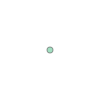

In [ ]:
Kennedy = Point(-74.06586111, 4.62055556)
Kennedy

In [ ]:
Kennedy = gdp.GeoSeries(Kennedy, crs = 4326)
Kennedy

0    POINT (-74.06586 4.62056)
dtype: geometry

In [ ]:
Kennedy = Kennedy.to_crs(epsg=9377)
Kennedy

0    POINT (4881819.767 2068655.042)
dtype: geometry

In [ ]:
gdf_barrios["distancia_u"]= [Kennedy.distance(centroid)/1000 for centroid in gdf_barrios.centroid]

<Axes: >

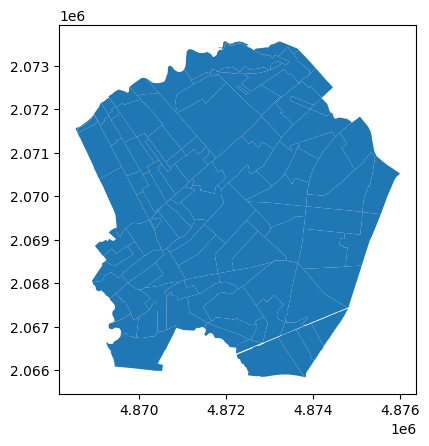

In [ ]:
gdf_barrios.plot()

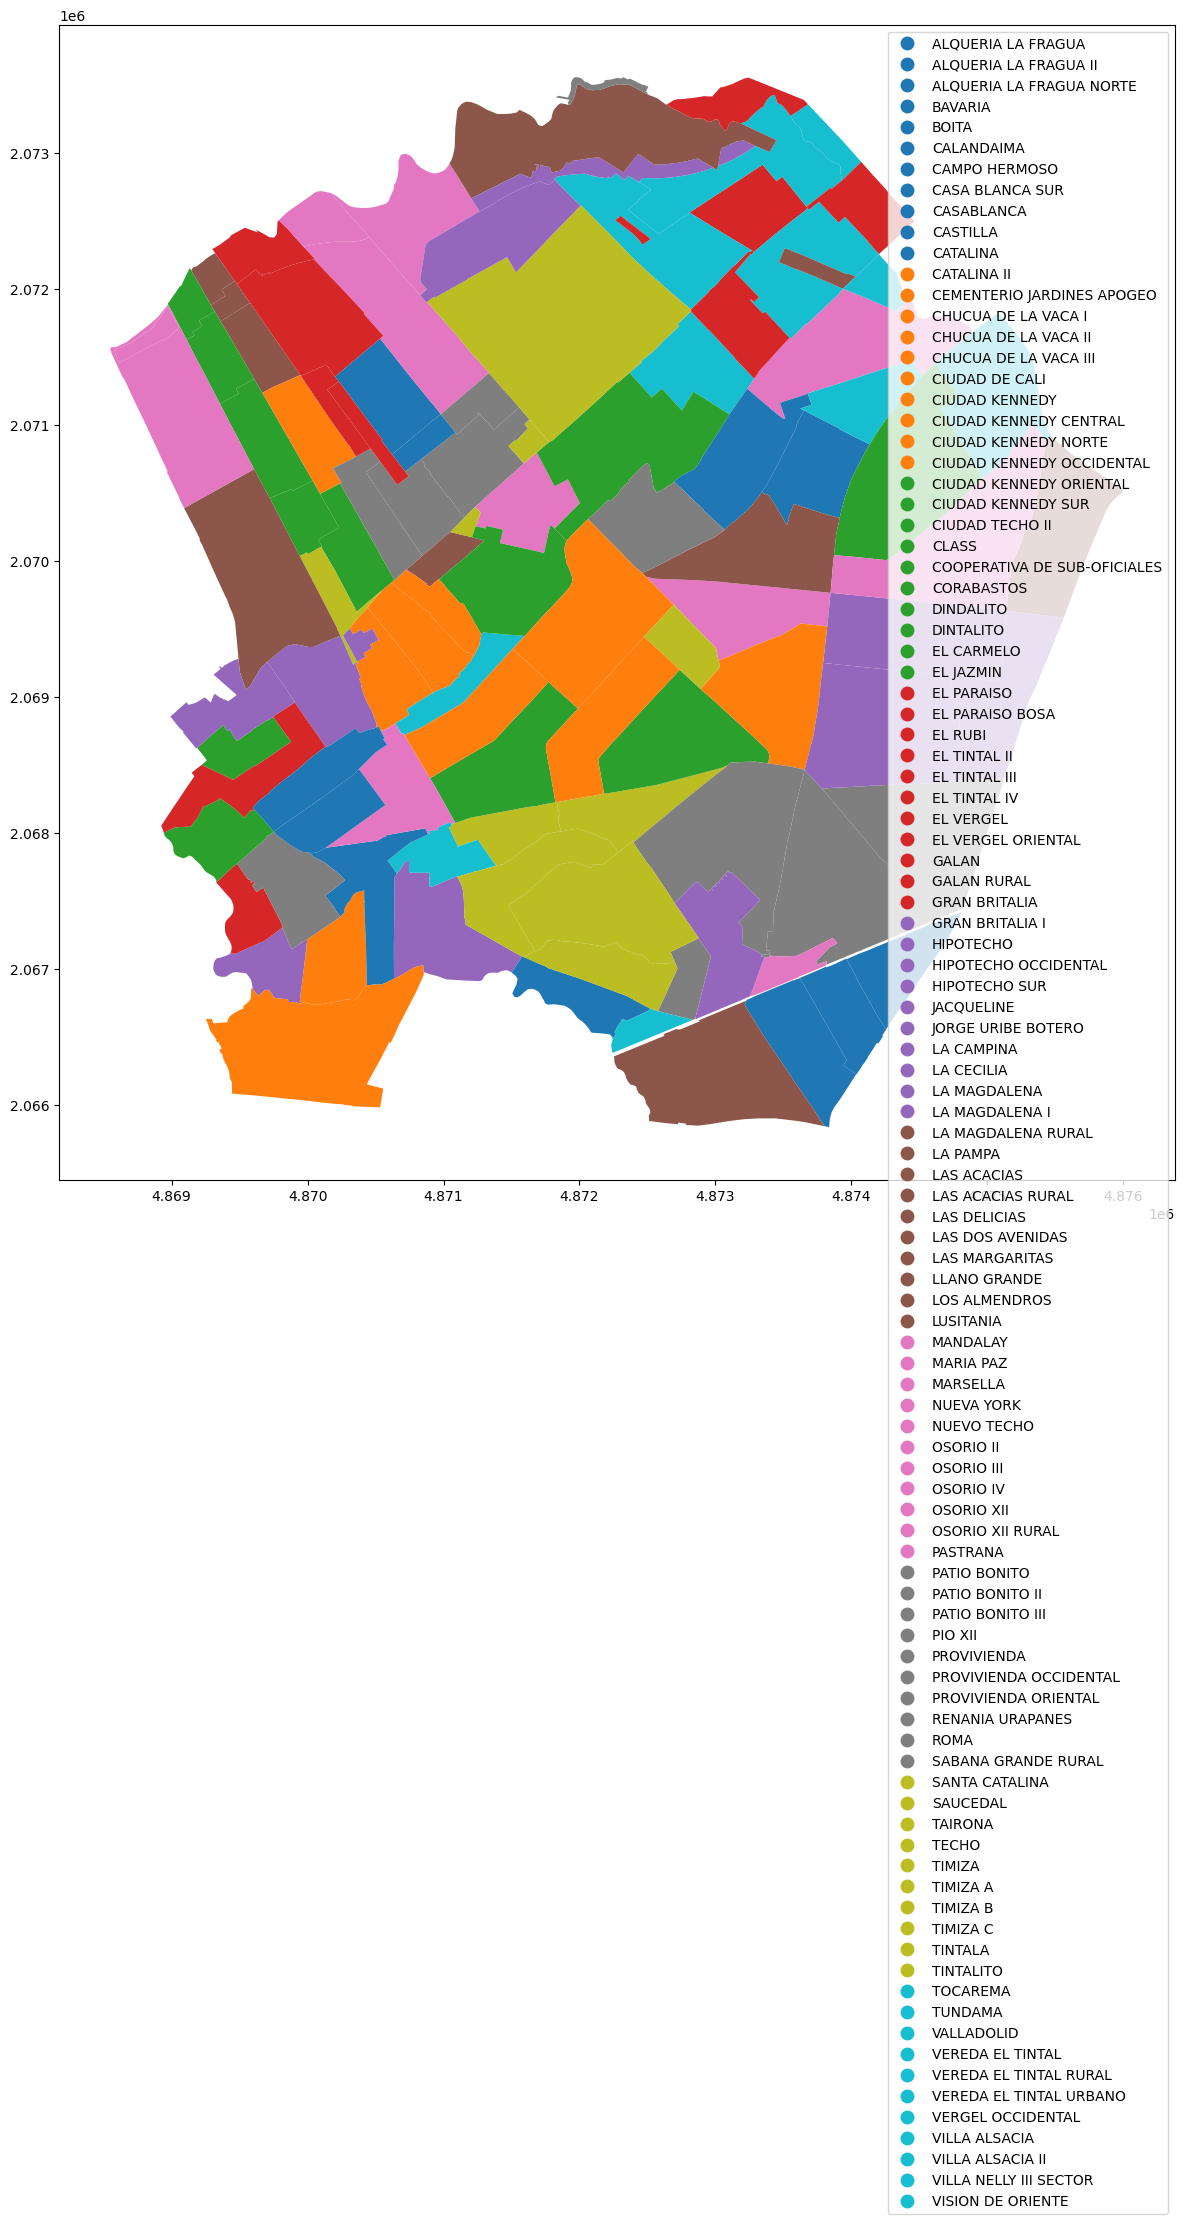

In [ ]:
mapa_2= gdf_barrios.plot(
    column = "SCANOMBRE",
    figsize = (15,15),
    cmap = 'tab10',
    legend = True,

)

In [ ]:
!pip install contextily
import contextily as cx

In [ ]:
cx.add_basemap(ax, crs=mapa_2.crs.to_string())

Agregación de datos

In [ ]:
import pandas as pd
poblacion= pd.read_csv("poblacion.csv", encoding= "latin1", delimiter= ";")
poblacion.head()

,Año,Cod_Loc,Localidad,Sexo,Edad,Grupo_Edad,Población
0,2005,1,Usaquén,Hombres,0,00 a 04,2909
1,2005,1,Usaquén,Hombres,1,00 a 04,2954
2,2005,1,Usaquén,Hombres,2,00 a 04,2919
3,2005,1,Usaquén,Hombres,3,00 a 04,2989
4,2005,1,Usaquén,Hombres,4,00 a 04,3079


In [ ]:
import geopandas as gpd

In [ ]:
localidades=  gpd.read_file("loca.json")
localidades.head()

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363..."
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."


Limpieza de datos y transformación de datos

In [ ]:
pobla2024= poblacion[poblacion["Año"] ==2024]

pobla2024.head()

,Año,Cod_Loc,Localidad,Sexo,Edad,Grupo_Edad,Población
76760,2024,1,Usaquén,Hombres,0,00 a 04,3128
76761,2024,1,Usaquén,Hombres,1,00 a 04,3147
76762,2024,1,Usaquén,Hombres,2,00 a 04,3139
76763,2024,1,Usaquén,Hombres,3,00 a 04,3106
76764,2024,1,Usaquén,Hombres,4,00 a 04,3037


Agrupar datos por localidad es decir 19 grupos de registros por localidad

In [ ]:
grupos= pobla2024.groupby("Localidad")
print(grupos)

sumar las poblaciones de esos grupos

In [ ]:
totalPoblacionLocaliad= grupos["Población"].sum()
print(totalPoblacionLocaliad)

Localidad
Antonio Nariño          84979
Barrios Unidos         156268
Bogotá                7929539
Bosa                   733740
Chapinero              182103
Ciudad Bolívar         666809
Engativá               819441
Fontibón               408155
Kennedy               1037929
La Candelaria           18675
Los Mártires            83001
Puente Aranda          258034
Rafael Uribe Uribe     391588
San Cristóbal          409106
Santa Fe               107906
Suba                  1313453
Sumapaz                  3926
Teusaquillo            165438
Tunjuelito             184492
Usaquén                594611
Usme                   414995
Name: Población, dtype: int64


convertir la serie en data frame

In [ ]:
dfPoblacion= totalPoblacionLocaliad.reset_index()
dfPoblacion

,Localidad,Población
0,Antonio Nariño,84979
1,Barrios Unidos,156268
2,Bogotá,7929539
3,Bosa,733740
4,Chapinero,182103
5,Ciudad Bolívar,666809
6,Engativá,819441
7,Fontibón,408155
8,Kennedy,1037929
9,La Candelaria,18675


se convierte a mayusculas y se quitan las tildes

In [ ]:
#mayus

dfPoblacion["Localidad"]= dfPoblacion["Localidad"].str.upper()

dfPoblacion

,Localidad,Población
0,ANTONIO NARIÑO,84979
1,BARRIOS UNIDOS,156268
2,BOGOTÁ,7929539
3,BOSA,733740
4,CHAPINERO,182103
5,CIUDAD BOLÍVAR,666809
6,ENGATIVÁ,819441
7,FONTIBÓN,408155
8,KENNEDY,1037929
9,LA CANDELARIA,18675


In [ ]:
#QUITAR TILDES

#TIPO DE DATOS: DICCIONARIO

def quitarTilde (input_str):
  remplazo= {
      "Á": "A",
      "É": "E",
      "Í": "I",
      "Ó": "O",
      "Ú": "U",
  }
   for accented_char, unaccented_char in reemplazo.items():
    input_str= input_str.replace(accented_char, unaccented_char)
    return input_str

IndentationError: unexpected indent (<ipython-input-28-f026763707e7>, line 13)

In [ ]:
filas= dfPoblacion["Localidad"]== "LA CANDELARIA"
filas

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: Localidad, dtype: bool

aplciar mascara: tocar lo verdadero y no lo falso

In [ ]:
columna= 'Localidad'
dfPoblacion.loc[filas,columna]= "CANDELARIA"
dfPoblacion

,Localidad,Población
0,ANTONIO NARIÑO,84979
1,BARRIOS UNIDOS,156268
2,BOGOTÁ,7929539
3,BOSA,733740
4,CHAPINERO,182103
5,CIUDAD BOLÍVAR,666809
6,ENGATIVÁ,819441
7,FONTIBÓN,408155
8,KENNEDY,1037929
9,CANDELARIA,18675


MEZCLAS MERGE

In [ ]:
MERGE= localidades.merge(dfPoblacion, left_on= "LocNombre", right_on= "Localidad")

MERGE

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,Localidad,Población
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",ANTONIO NARIÑO,84979
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363...",TUNJUELITO,184492
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233...",RAFAEL URIBE URIBE,391588
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317...",CANDELARIA,18675
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594...",BARRIOS UNIDOS,156268
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((-74.09372 4.66607, -74.09332 4.66574...",TEUSAQUILLO,165438
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053...",PUENTE ARANDA,258034
7,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((-74.20584 4.26966, -74.20584 4.26966...",SUMAPAZ,3926
8,91,CHAPINERO,Acuerdo 8 de 1977 y Res 1751 de 2016,3.800891e+07,02,0.333966,0.003095,"POLYGON ((-74.01116 4.66459, -74.01154 4.66461...",CHAPINERO,182103
9,92,SANTA FE,Acuerdo 117 de 2003,4.517065e+07,03,0.395052,0.003678,"POLYGON ((-73.99446 4.61425, -73.99457 4.61414...",SANTA FE,107906


BORRAR

In [ ]:
MERGE.drop("Localidad", axis=1, inplace= True)
MERGE

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,Población
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",84979
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363...",184492
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233...",391588
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317...",18675
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594...",156268
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((-74.09372 4.66607, -74.09332 4.66574...",165438
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053...",258034
7,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((-74.20584 4.26966, -74.20584 4.26966...",3926
8,91,CHAPINERO,Acuerdo 8 de 1977 y Res 1751 de 2016,3.800891e+07,02,0.333966,0.003095,"POLYGON ((-74.01116 4.66459, -74.01154 4.66461...",182103
9,92,SANTA FE,Acuerdo 117 de 2003,4.517065e+07,03,0.395052,0.003678,"POLYGON ((-73.99446 4.61425, -73.99457 4.61414...",107906


TALLER= crear un mapa cloropletico de bogota y su población.

Poner mapa base

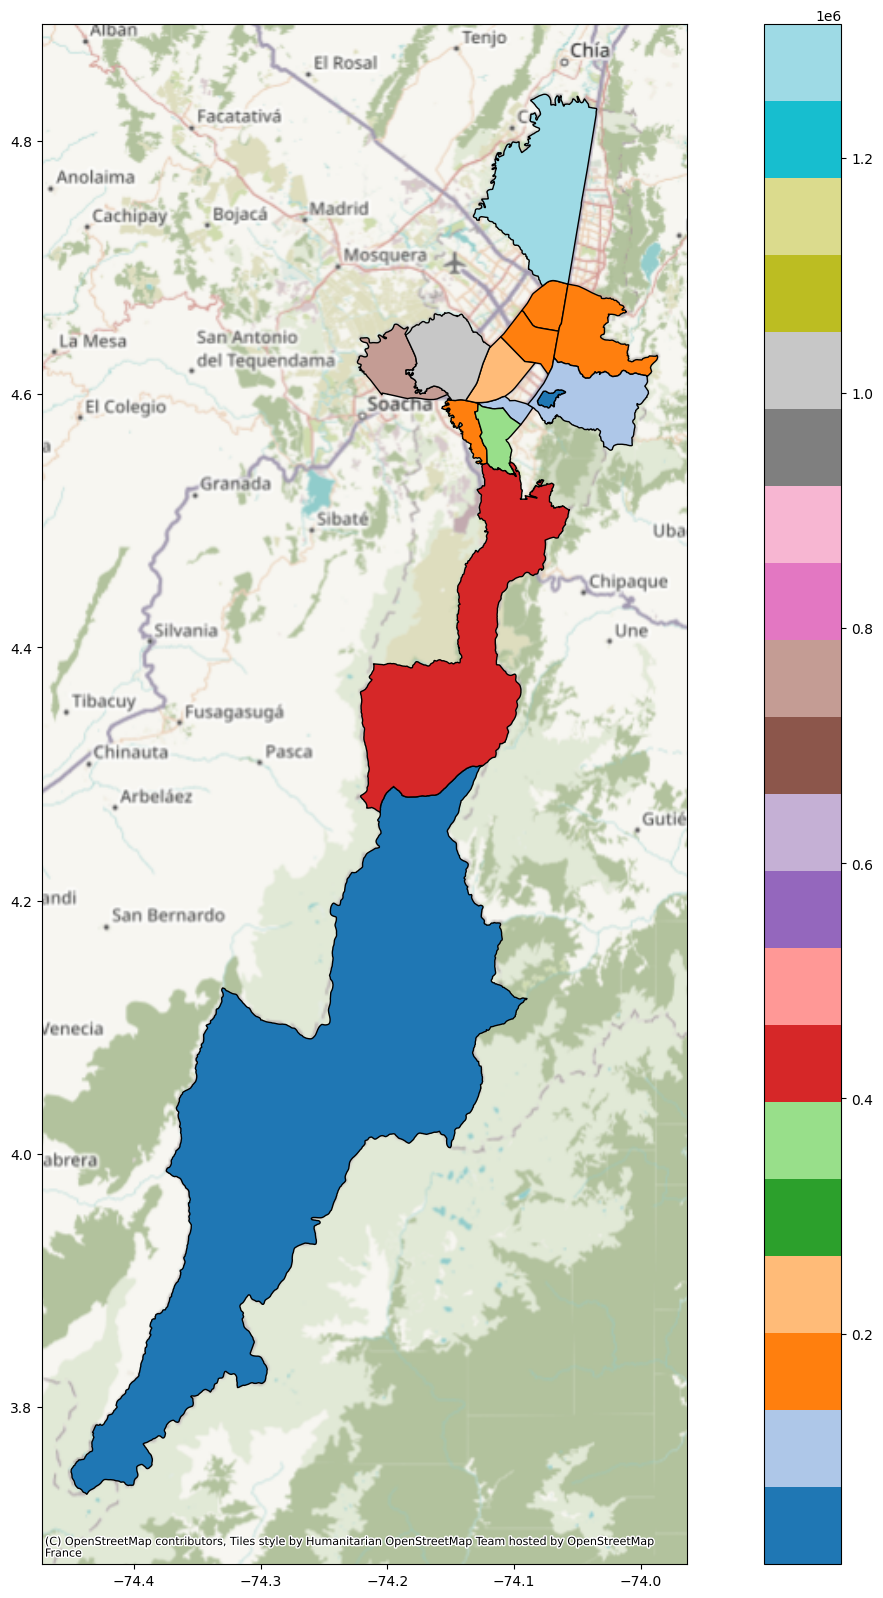

In [ ]:
mapa= MERGE.plot(

    column= "Población",
    legend= True,
    figsize=(20,20),
    edgecolor="black",
    cmap= 'tab20',


)

cx.add_basemap(mapa, crs=MERGE.crs.to_string())